# 📊Projet: Application du Machine Learning aux données financières d'Apple

________

## Objectif

Ce projet vise à exploiter les données financières d'Apple pour générer des insights stratégiques et des recommandations d'investissement ciblées. À travers un processus analytique complet — extraction et traitement des données de marché, analyse quantitative de performance, et déploiement d'algorithmes de machine learning — nous développerons des modèles prédictifs robustes et des stratégies de trading algorithmique optimisées, transformant ainsi l'information brute en intelligence décisionnelle actionnable.
______________

### 1. Analyse Exploratoire des Données (EDA)
- Collecter et nettoyer les données historiques du cours d'Apple (AAPL)

### 2. Feature Engineering
- Créer des indicateurs techniques 

### 3. Modélisation Prédictive
**Objectif principal :** Prédire le prix de clôture d'Apple

#### Modèles à tester :
- Random Forest Regressor
- XGBoost

### 4. Évaluation et Comparaison
- Comparer les performances des modèles avec :
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
  - R² Score

### 5. Visualisation et Communication
- Créer des graphiques interactifs (Plotly)
- Visualiser les prédictions vs valeurs réelles
- Dashboard des métriques de performance


### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf #librairie pour importer les données financières
import seaborn as sns

### Importation des données

In [2]:
# télécharger le cours de l'actionn apple entre 20220 et 2024
apple = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
apple

C:\Users\vanst\AppData\Local\Temp\ipykernel_50780\4070648655.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405685,72.444328,70.703020,70.954195,118387200
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
2020-01-08,73.224396,73.526287,71.768071,71.768071,132079200
...,...,...,...,...,...
2024-12-23,254.367004,254.745650,252.553435,253.868773,40858800
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700


In [3]:
#supprimer le nivau ticker
apple.columns =  apple.columns.droplevel("Ticker")

### Nettoyage des données

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [5]:
apple.describe()

Price,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,151.728301,153.253333,150.026017,151.571824,9.061168e+07
std,41.896383,42.035035,41.671140,41.835806,5.324605e+07
min,54.316936,55.316755,51.470001,55.215079,2.323470e+07
25%,126.607033,127.694579,124.586245,126.080066,5.546960e+07
50%,150.366394,152.119813,148.366922,150.191824,7.629970e+07
75%,176.243698,177.947018,174.809363,176.090173,1.077601e+08
max,258.103729,259.179926,256.718662,257.276679,4.265100e+08


In [6]:
#identifier les valeurs manquantes
apple.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Aucune variable n'a de valeurs manquantes

In [7]:
# vérifier les lignes ayant des doublons
apple[apple.duplicated()]

Price,Close,High,Low,Open,Volume
Date,,,,,


Aucun doublon dans notre dataset

<Axes: >

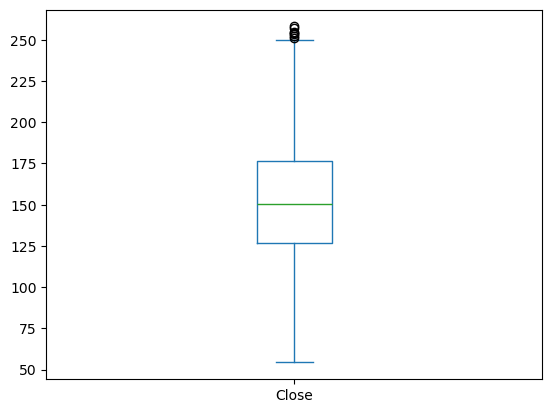

In [15]:
#Déterminer les valeurs abérantes pour cela nous allons visualiser à l'aide d'un boxplot
apple.Close.plot.box()


In [20]:
#On veut construire un modèle de ML qui permet de prédire si le prix est à la hausse ou à la baisse, pour cela on va calculer le SMA_20 et le RSI
#calcul du SMA
apple["SMA_20"] = apple["Close"].rolling(window = 20).mean()

#calcul du RSI en utilisant une fonction existante
import ta
apple["RSI"] = ta.momentum.RSIIndicator(apple["Close"]).rsi()

In [21]:
# on va créer une nouvelle variable target qu'on souhaite prédire pour identifier le prix de demain
apple["Target"] = (apple["Close"].shift(-1) > apple["Close"]).astype(int)

In [22]:
#suuprimer les valeurs manquantes pour réaliser le modèle
apple.dropna(inplace = True)
apple.head()

Price,Close,High,Low,Open,Volume,SMA_20,RSI,Target
Date,,,,,,,,
2020-01-30,78.218910,78.272043,76.982363,77.414674,126743200,75.360962,66.350162,0
2020-01-31,74.750771,77.931496,74.456124,77.508848,199588400,75.471574,48.053090,0
2020-02-03,74.545464,75.711969,72.990118,73.492462,173788400,75.607183,47.222887,1
2020-02-04,77.006516,77.197313,75.745816,76.151556,136616400,75.837224,56.847266,1
2020-02-05,77.634438,78.433846,77.030654,78.134364,118826800,76.115688,58.906338,1


### Modèle de classification pour le trading

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [24]:
#Initialiser les features et les target
features = ['SMA_20', 'RSI']
X = apple[features]
y= apple['Target']

In [25]:
#on va diviser les données de test et d'entrainement train/test
X_train, X_test, y_train,y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [27]:
# On conçoit le modèle
clf = RandomForestClassifier(n_estimators= 100, random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
#on fait les prédictions
y_pred = clf.predict(X_test)

#on va utiliser la fonction classification_report pour avoir la précision du modèle (plus la précision est élevée plus le modèle est performant)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.42      0.80      0.56       106
           1       0.56      0.19      0.28       142

    accuracy                           0.45       248
   macro avg       0.49      0.50      0.42       248
weighted avg       0.50      0.45      0.40       248



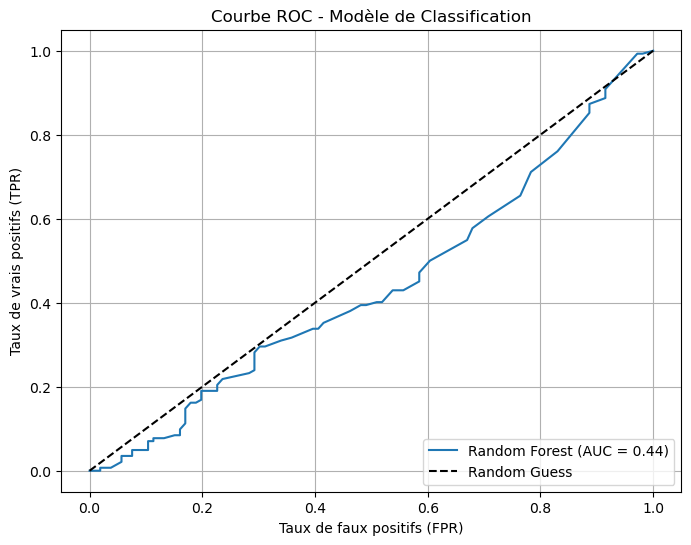

In [32]:
# Prédictions probabilistes
y_prob = clf.predict_proba(X_test)[:, 1]

# Calcul ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Affichage courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Modèle de Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 

Un modèle performant est un modèle qui a une auc > 50%. Ce modèle n'est pas bon. 

### Modèle de regression pour la prédiction des prix


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Prédire le prix de clôture du lendemain
apple['Close_tomorrow'] = apple['Close'].shift(-1)
apple.dropna(inplace=True)

X = apple[features]
y = apple['Close_tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

RMSE: 29.474642906419525
R²: -0.33629760733232406


Avec une RMSE de 29 et une R² on peut conclure que le modèle n'est pas bon

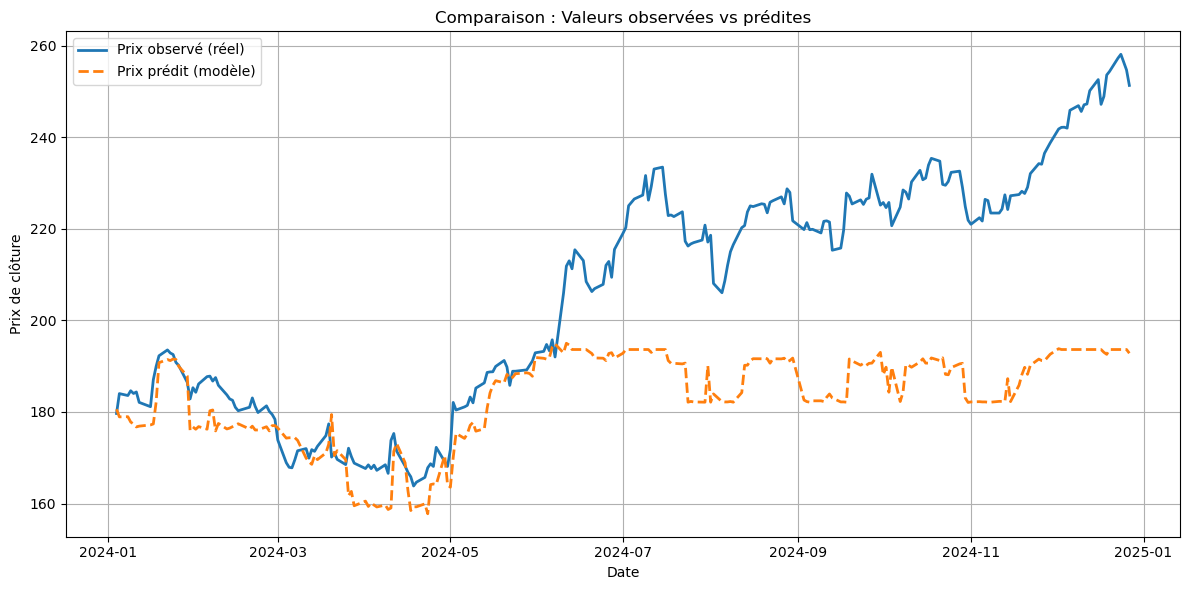

In [39]:
# Visualisation : valeurs observées contre prédites

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Prix observé (réel)", linewidth=2)
plt.plot(y_test.index, y_pred, label="Prix prédit (modèle)", linestyle='--', linewidth=2)
plt.title("Comparaison : Valeurs observées vs prédites")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Les valeurs prédites sont très éloignées de la réalité donc le modèle n'est pas performant

### Tester les performances du modèle

### Intégrer le modèle dans une stratégie de Trading

In [63]:
# Étape 1 : Générer les signaux de trading à partir des prédictions du modèle de classification
# On utilise les prédictions sur le jeu de test
apple_test = apple.iloc[-len(y_test):].copy()  # copie alignée avec X_test
apple_test['Signal'] = clf.predict(X_test)

In [64]:
# Étape 2 : Calculer les rendements du marché
# Rendement quotidien : variation relative du prix de clôture
apple_test['Returns'] = apple_test['Close'].pct_change()

In [65]:
# Rendement de la stratégie basée sur les signaux
# On applique le signal de la veille au rendement du jour
apple_test['Strategy_Returns'] = apple_test['Returns'] * apple_test['Signal'].shift(1)

In [66]:
# Étape 3 : Performance cumulée
apple_test['Cumulative_Market'] = (1 + apple_test['Returns']).cumprod()
apple_test['Cumulative_Strategy'] = (1 + apple_test['Strategy_Returns']).cumprod()


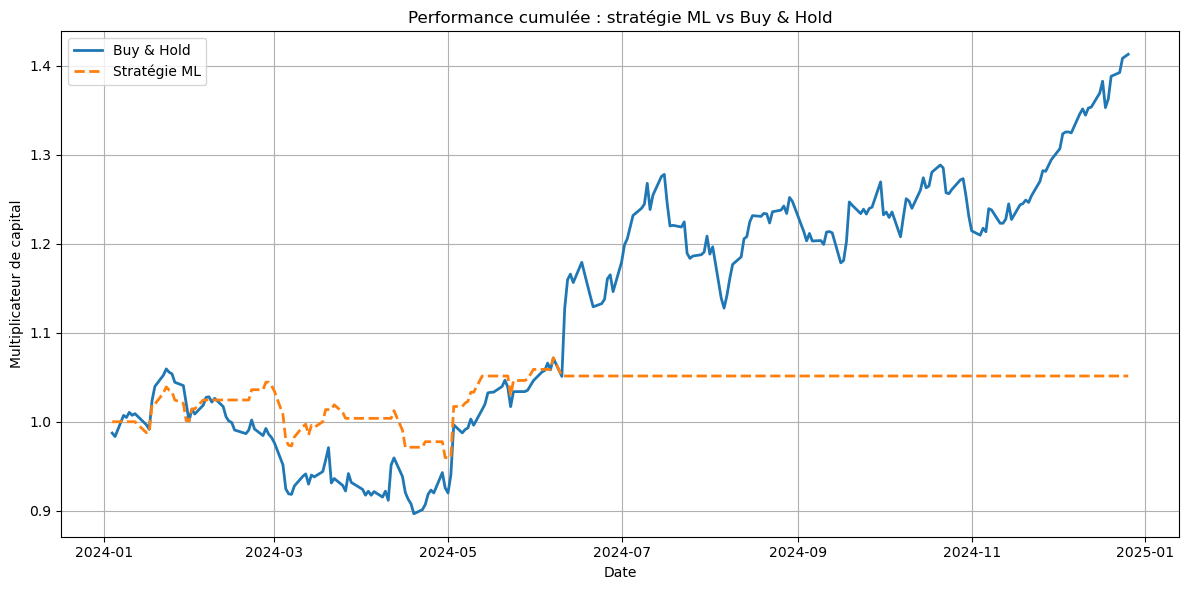

In [67]:
# Étape 4 : Visualisation
plt.figure(figsize=(12, 6))
plt.plot(apple_test.index, apple_test['Cumulative_Market'], label='Buy & Hold', linewidth=2)
plt.plot(apple_test.index, apple_test['Cumulative_Strategy'], label='Stratégie ML', linewidth=2, linestyle='--')
plt.title('Performance cumulée : stratégie ML vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Multiplicateur de capital')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Prediction des prix avec XGBOOST Regressor

In [58]:
#importation dle modèle XGBoost(qui est l'un des modèle performant)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
#définir et entrainer le modèle
model = XGBRegressor(objective= 'reg:squarederror', n_estimators = 100, random_state=42)
model.fit(X_train, y_train)

# prédire le modèle sur le jeunde test
y_pred = model.predict(X_test)

In [61]:
#on va évaluer les performances du modèle
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 28.902154272088797
MAE: 22.64898589349562
R²: -0.296111271833325


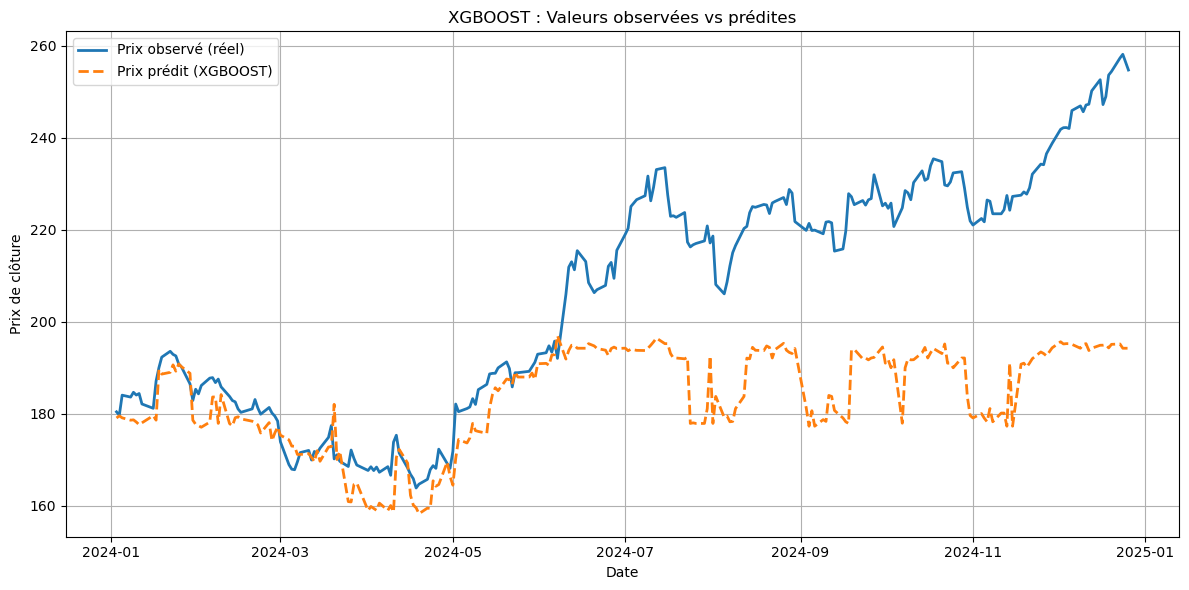

In [62]:
# Visualisation : valeurs observées contre prédites

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Prix observé (réel)", linewidth=2)
plt.plot(y_test.index, y_pred, label="Prix prédit (XGBOOST)", linestyle='--', linewidth=2)
plt.title("XGBOOST : Valeurs observées vs prédites")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()